Set `autoreload` to execute the change in `.py` files.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import natsort
import glob
import cv2
import dlib

print(dlib.DLIB_USE_CUDA)
print(dlib.cuda.get_num_devices())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import _pickle
import sys
from pathlib import Path


dataset_dir = "D:/Databases/CAS(ME)^2"
# dataset_dir = "F:/HEH/Databases/CAS(ME)^2"
# dataset_dir = "/data/disk1/heh/databases/CAS(ME)^2"

# dataset_dir = "D:/Databases/SAMM_longvideos"
# dataset_dir = "F:/HEH/Databases/SAMM_longvideos"
# dataset_dir = "/data/disk1/heh/databases/SAMM_longvideos"

test_dataset_dir = "D:/Databases/MEGC2022_testSet/CAS_Test_cropped"
# test_dataset_dir = "F:/HEH/Databases/MEGC2022_testSet/CAS_Test_cropped"
# test_dataset_dir = "/data/disk1/heh/databases/MEGC2022_testSet/CAS_Test_cropped"

# test_dataset_dir = "D:/Databases/MEGC2022_testSet/SAMM_Test_cropped"
# test_dataset_dir = "F:/HEH/Databases/MEGC2022_testSet/SAMM_Test_cropped"
# test_dataset_dir = "/data/disk1/heh/databases/MEGC2022_testSet/SAMM_Test_cropped"

images_loading = False
image_size = 128
load_cropped_images = False

True
1


## Load Images Paths


In [3]:
from image_processing import *

# videos_images, subjects, subjects_videos_code = load_images(dataset_dir)

videos_images, subjects, subjects_videos_code = load_images_dev(
    dataset_dir,
    images_loading=images_loading,
    image_size=image_size,
    load_cropped_images=load_cropped_images,
)

subject:  s15
subject:  s16
subject:  s19
subject:  s20
subject:  s21
subject:  s22
subject:  s23
subject:  s24
subject:  s25
subject:  s26
subject:  s27
subject:  s29
subject:  s30
subject:  s31
subject:  s32
subject:  s33
subject:  s34
subject:  s35
subject:  s36
subject:  s37
subject:  s38
subject:  s40


In [4]:
print("subjects:", subjects)
print("subjects_videos_code:", subjects_videos_code)

subjects: ['s15', 's16', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's40']
subjects_videos_code: [['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0508'], ['0101', '0102', '0401', '0402', '0502', '0505', '0507'], ['0102', '0402', '0505', '0507', '0502'], ['0502'], ['0101', '0401'], ['0101', '0102', '0402', '0503', '0508'], ['0102', '0402', '0503', '0507'], ['0101', '0401', '0402', '0502', '0507'], ['0101', '0102', '0502', '0508'], ['0101', '0102', '0401', '0503'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0502'], ['0101', '0102', '0401', '0502', '0503', '0505', '0507'], ['0101', '0401', '0402', '0502', '0503', '0505', '0507'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0102', '0402'], ['0401', '0402', '0503'], ['0102'], ['0401', '0505'], ['0101', '0402', '0502', '0505', '0507', '0508'], ['0502', '0507'], ['0401', '0502', '

In [5]:
from image_processing import *

test_videos_images, test_subjects, test_videos_name = load_images_dev(
    test_dataset_dir,
    images_loading=images_loading,
    image_size=image_size,
    load_cropped_images=load_cropped_images,
)

test_subject_video_code:  sub01
test_subject_video_code:  sub02
test_subject_video_code:  sub03
test_subject_video_code:  sub04
test_subject_video_code:  sub05


In [6]:
print("test_subjects:", test_subjects)
print("test_videos_name:", test_videos_name)

test_subjects: ['sub01', 'sub02', 'sub03', 'sub04', 'sub05']
test_videos_name: ['sub01', 'sub02', 'sub03', 'sub04', 'sub05']


## Debug Cropping


videos_images[0][0]: D:\Databases\CAS(ME)^2\rawpic\s15\15_0101disgustingteeth\img001.jpg


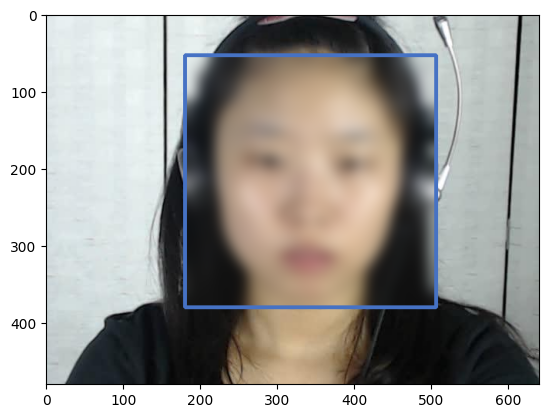

In [7]:
print(f"videos_images[0][0]: {videos_images[0][0]}")
image = cv2.imread(str(videos_images[0][0]))

cv2.cvtColor(image, cv2.COLOR_RGB2BGR, image)

# use DNN Face Detector in OpenCV
modelFile = "./__utils__/res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "./__utils__/deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
frameHeight, frameWidth, _ = image.shape
conf_threshold = 0.5
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], False, False)
net.setInput(blob)
detections = net.forward()
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
half_difference = ((y2 - y1) - (x2 - x1)) // 2
crop_left = 0 if x1 - half_difference < 0 else x1 - half_difference
crop_right = frameWidth if x2 + half_difference > frameWidth else x2 + half_difference

face = image[y1:y2, crop_left:crop_right]
face = cv2.GaussianBlur(face, ksize=(51, 51), sigmaX=0)
image[y1:y2, crop_left:crop_right] = face

new_image = cv2.rectangle(image, (crop_left, y1), (crop_right, y2), (70, 114, 196), 3)
plt.imshow(new_image.astype("uint8"))

# # imwrite
# cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR, new_image)
# cv2.imwrite("rawpic_with_retangle.jpg", new_image)

videos_images[0][0]: D:\Databases\CAS(ME)^2\rawpic\s15\15_0101disgustingteeth\img001.jpg
dlib height = 267, weight = 268
cv2 dnn height = 337, weight = 246


Text(0.5, 1.0, 'cv2 face')

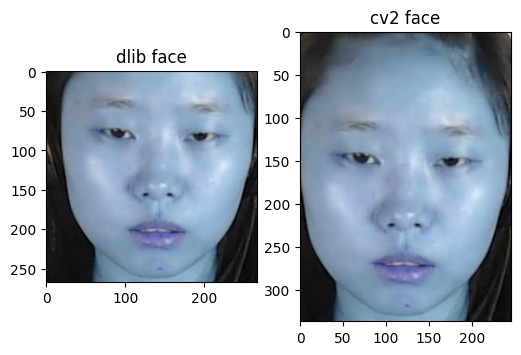

In [8]:
print(f"videos_images[0][0]: {videos_images[0][0]}")
image = cv2.imread(str(videos_images[0][0]))

face_detector = dlib.get_frontal_face_detector()
detected_faces = face_detector(image, 1)
for face_rect in detected_faces:
    face_top = face_rect.top()
    face_bottom = face_rect.bottom()
    face_left = face_rect.left()
    face_right = face_rect.right()
print(f"dlib height = {face_bottom-face_top}, weight = {face_right-face_left}")
dlib_face = image[face_top:face_bottom, face_left:face_right]

modelFile = "./__utils__/res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "./__utils__/deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
# use DNN Face Detector in OpenCV
frameHeight, frameWidth, _ = image.shape
conf_threshold = 0.5
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], False, False)
net.setInput(blob)
detections = net.forward()
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
print(f"cv2 dnn height = {y2-y1}, weight = {x2-x1}")
cv2_face = image[y1:y2, x1:x2]

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(dlib_face.astype("uint8"))
plt.title("dlib face")
plt.subplot(1, 2, 2)
plt.imshow(cv2_face.astype("uint8"))
plt.title("cv2 face")